In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
vdgame = pd.read_csv("/content/videogames.csv")
print(vdgame.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Developer Rating

**Null values in VDgame**

In [21]:
print(vdgame.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


**Lets removing the null values**

In [22]:
vdgame= vdgame.dropna()

**Lets look top 10 best-selling game**

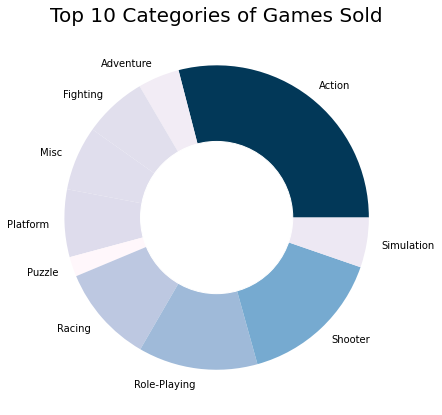

In [27]:
import matplotlib as mpl
game = vdgame.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

In [28]:
print(vdgame.corr())


                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.016239  0.041346 -0.038443     0.042315   
NA_Sales               -0.016239  1.000000  0.841808  0.468607     0.726757   
EU_Sales                0.041346  0.841808  1.000000  0.519929     0.716330   
JP_Sales               -0.038443  0.468607  0.519929  1.000000     0.394823   
Other_Sales             0.042315  0.726757  0.716330  0.394823     1.000000   
Global_Sales            0.006661  0.955793  0.939313  0.613546     0.804028   
Critic_Score           -0.007661  0.233580  0.213102  0.147314     0.191509   
Critic_Count            0.203336  0.283917  0.265740  0.168299     0.239513   
User_Score             -0.253914  0.085796  0.055915  0.127521     0.057083   
User_Count              0.199348  0.246208  0.283504  0.072773     0.240085   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release      0.006661     -0.007661      0.203336

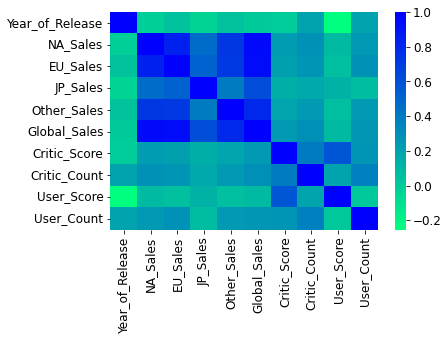

In [29]:
sns.heatmap(vdgame.corr(), cmap="winter_r")
plt.show()

**Video Game Sales Prediction**

In [30]:
X = vdgame[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = vdgame["Global_Sales"]

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [36]:
predictions

array([6.02947586, 0.44020146, 0.2302397 , ..., 0.22019897, 0.04024748,
       0.96017088])

In [37]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [40]:
test_data_accuracy=accuracy_score(np.round(predictions),np.round(ytest))


In [41]:
print("Accuracy:",test_data_accuracy)

Accuracy: 0.9926739926739927
